In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = data_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


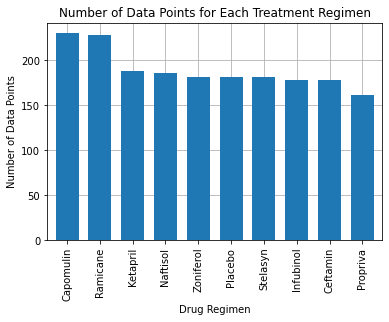

In [3]:

# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)

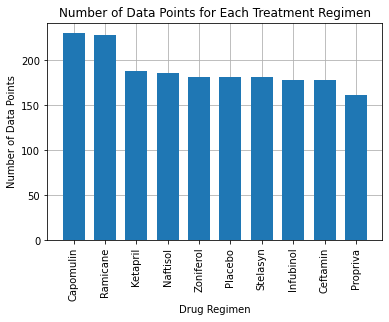

In [4]:

# Calculate the amount of data points for each drug regimen
counts = data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

# Display resulting plot
plt.show()

In [5]:
# Find max timepoint for each mouse

max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [20]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
# temp_df
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
# final_volume_df
#     # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
print(values)
    
# # Calculate and print the interquartile range (IQR) for each regimen
# quartiles = values.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# # print(f'IQR for {drug}: {iqr}')
    
# # Find upper and lower bounds to help identify outliers for each regimen
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f'Lower Bound for {drug}: {lower_bound}')
# print(f'Upper Bound for {drug}: {upper_bound}')

# # Quantitatively check for outliers
# outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
#                                     (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
# print(f'Number of {drug} outliers: {outliers_count}')

493     62.999356
594     45.000000
600     56.057749
617     55.742829
840     48.722078
940     47.784682
993     61.849023
1033    68.923185
1112    67.748662
1119    57.918381
1122    46.784535
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1406    64.192341
1551    45.000000
1582    52.925348
1583    45.000000
1670    67.527482
1743    45.000000
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), dtype: float64
